## Day 50 Lecture 2 Assignment

In this assignment, we will apply various methods of internal evaluation to the results of K-Means clustering on a dataset containing the results of a survey on financial wellbeing.

In [1]:
%matplotlib inline


import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.cluster import KMeans, MeanShift
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score, davies_bouldin_score
from tqdm.notebook import tqdm

This dataset contains the results of a survey on a financial wellbeing conducted by the US Consumer Finance Protection Bureau that were published in October 2017. This dataset has a large number of columns, most of which correspond to specific questions on the survey. These codebook for translating the column names to questions can be found here:

https://s3.amazonaws.com/files.consumerfinance.gov/f/documents/cfpb_nfwbs-puf-codebook.pdf

Load the dataset.

In [2]:
# answer goes here
df = pd.read_csv('https://tf-assets-prod.s3.amazonaws.com/tf-curric/data-science/Data%20Sets%20Clustering/financial_wellbeing.csv')
df.head()



,PUF_ID,sample,fpl,SWB_1,SWB_2,SWB_3,FWBscore,FWB1_1,FWB1_2,FWB1_3,...,PPMSACAT,PPREG4,PPREG9,PPT01,PPT25,PPT612,PPT1317,PPT18OV,PCTLT200FPL,finalwt
0,10350,2,3,5,5,6,55,3,3,3,...,1,4,8,0,0,0,0,1,0,0.367292
1,7740,1,3,6,6,6,51,2,2,3,...,1,2,3,0,0,0,0,2,0,1.327561
2,13699,1,3,4,3,4,49,3,3,3,...,1,4,9,0,0,0,1,2,1,0.835156
3,7267,1,3,6,6,6,49,3,3,3,...,1,3,7,0,0,0,0,1,0,1.410871
4,7375,1,3,4,4,4,49,3,3,3,...,1,2,4,0,0,1,0,4,1,4.260668


As we did in the previous assignment, we will only use the score columns. Filter the columns of the dataset to only include these columns.

In [3]:
# answer goes here
col = [col for col in df.columns if 'score' in col]
df = df[col]
df.head()





,FWBscore,FSscore,LMscore,KHscore
0,55,44,3,1.267
1,51,43,3,-0.570
2,49,42,3,-0.188
3,49,42,2,-1.485
4,49,42,1,-1.900


Standardize the features in your dataset using scikit-learn's StandardScaler, which will set the mean of each feature to 0 and the variance to 1.

In [4]:
# answer goes here
scaler = StandardScaler()
scld = scaler.fit_transform(df)




Create an elbow plot showing how the SSE changes with respect to the number of clusters in K-Means. Allow K to vary from 2 to 30. Does a clear "elbow" emerge from the plot?

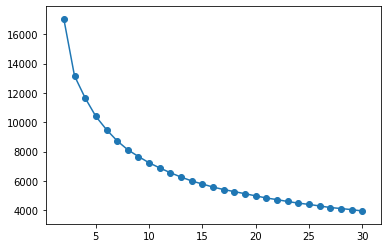

In [5]:
# answer goes here
sses = []
ks = range(2, 31)
for k in ks:
    clst = KMeans(k)
    clst.fit(scld)
    sse = clst.inertia_
    sses.append(sse)
plt.plot(ks, sses)
plt.scatter(ks, sses)
plt.show()



Create a silhouette plot for the results of K-Means, again with K varying from 2 to 30. What is the optimal number of clusters according to the silhouette method? Is this consistent with the output of the elbow plot?

In [6]:
test = pd.DataFrame(data = scld)

NameError: name 'axes' is not defined

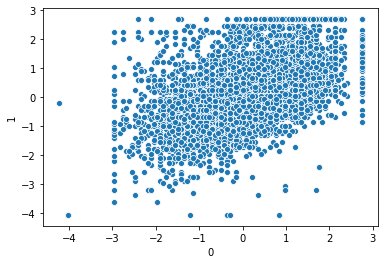

In [7]:
sns.scatterplot(0, 1, data=test)
axes[1].set_title("Raw Data")
plt.tight_layout()
plt.show()

MeanShift Clustering with bandwidth of 2.000.
Red markers are the cluster centers.


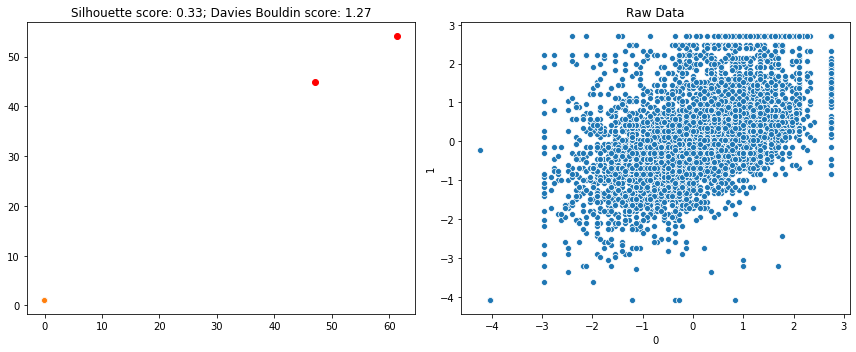


---------------------------------------------

MeanShift Clustering with bandwidth of 3.000.
Red markers are the cluster centers.


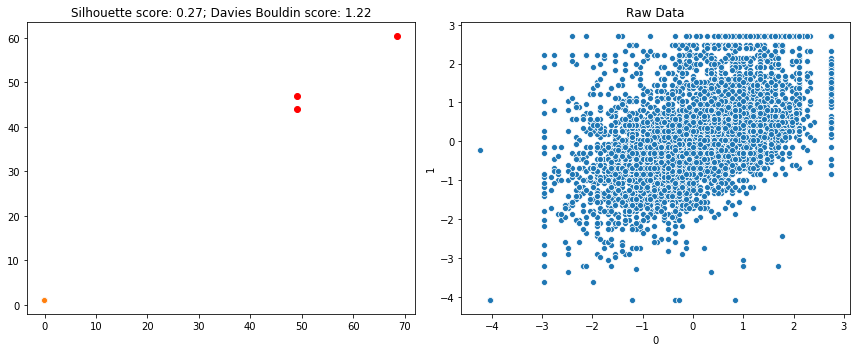


---------------------------------------------

MeanShift Clustering with bandwidth of 4.000.
Red markers are the cluster centers.


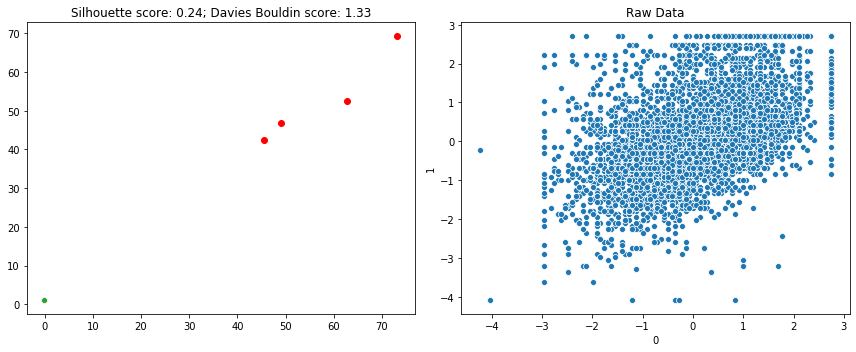


---------------------------------------------

MeanShift Clustering with bandwidth of 5.000.
Red markers are the cluster centers.


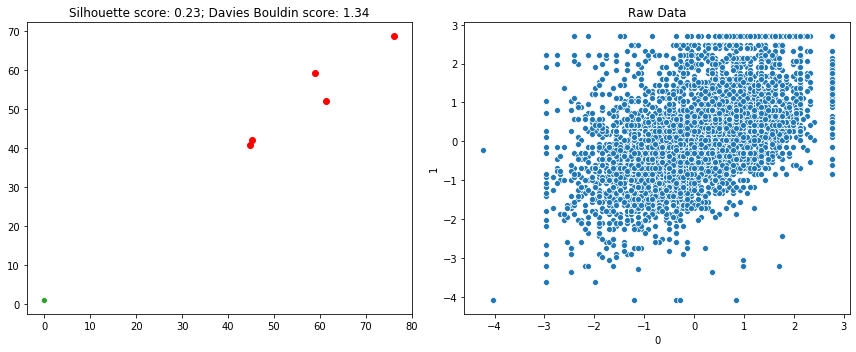


---------------------------------------------

MeanShift Clustering with bandwidth of 6.000.
Red markers are the cluster centers.


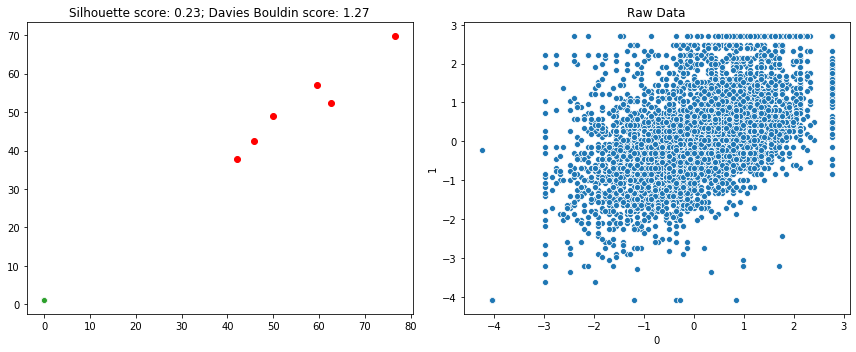


---------------------------------------------

MeanShift Clustering with bandwidth of 7.000.
Red markers are the cluster centers.


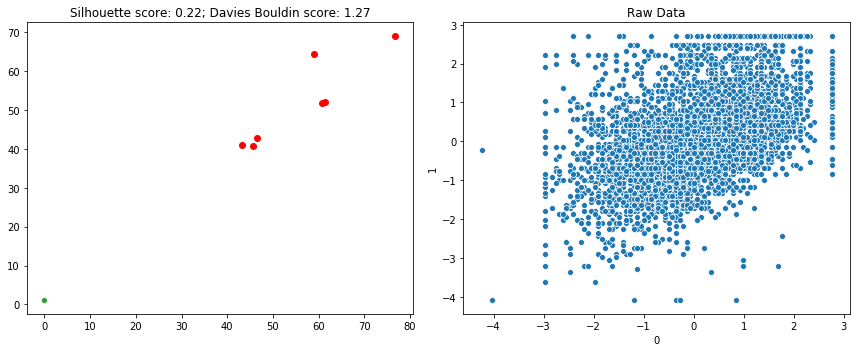


---------------------------------------------

MeanShift Clustering with bandwidth of 8.000.
Red markers are the cluster centers.


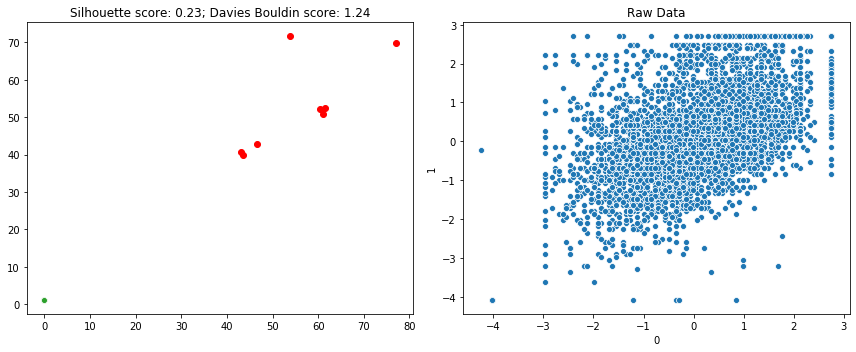


---------------------------------------------

MeanShift Clustering with bandwidth of 9.000.
Red markers are the cluster centers.


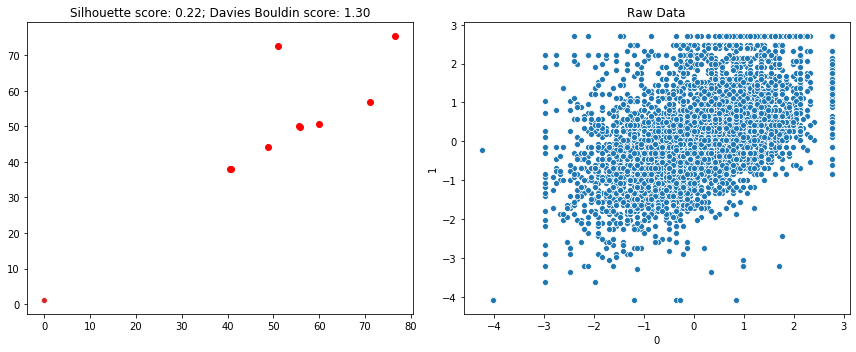


---------------------------------------------

MeanShift Clustering with bandwidth of 10.000.
Red markers are the cluster centers.


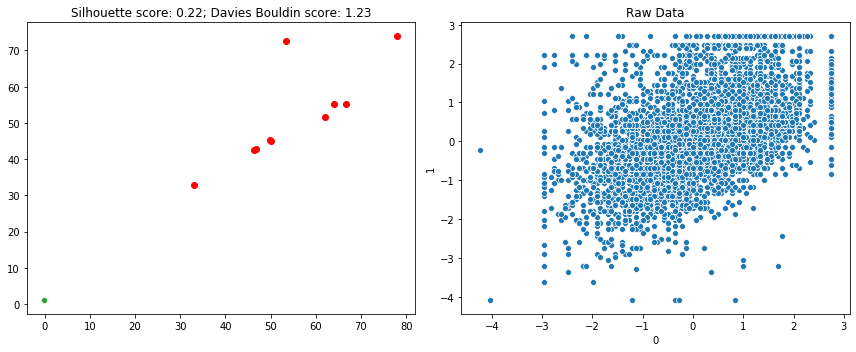


---------------------------------------------

MeanShift Clustering with bandwidth of 11.000.
Red markers are the cluster centers.


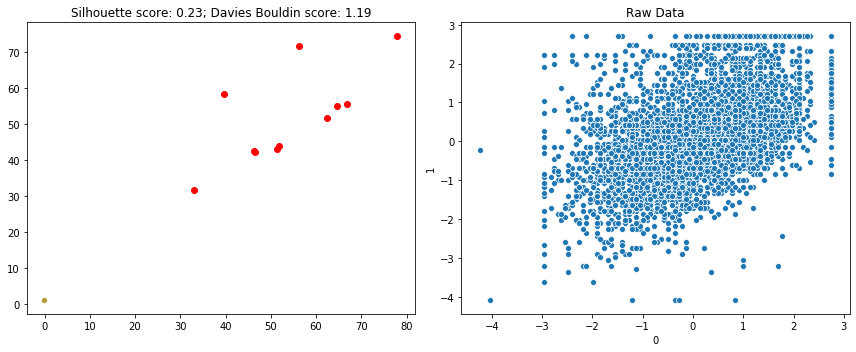


---------------------------------------------

MeanShift Clustering with bandwidth of 12.000.
Red markers are the cluster centers.


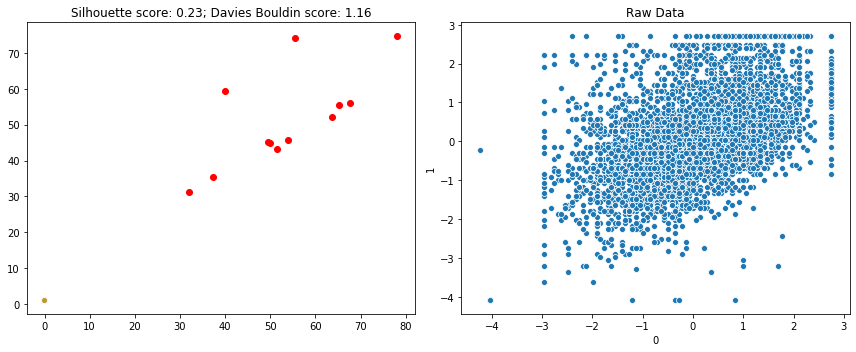


---------------------------------------------

MeanShift Clustering with bandwidth of 13.000.
Red markers are the cluster centers.


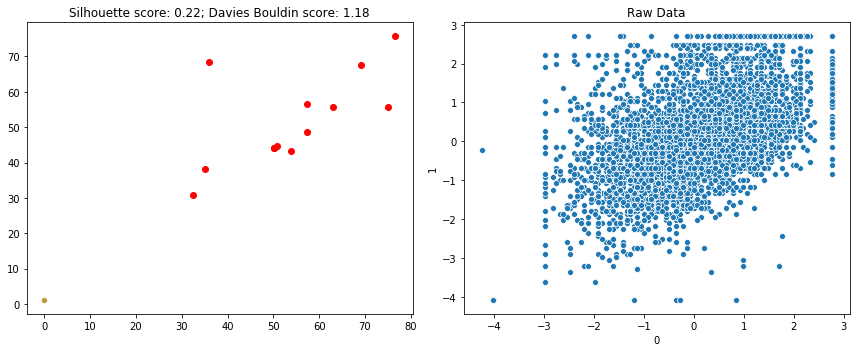


---------------------------------------------

MeanShift Clustering with bandwidth of 14.000.
Red markers are the cluster centers.


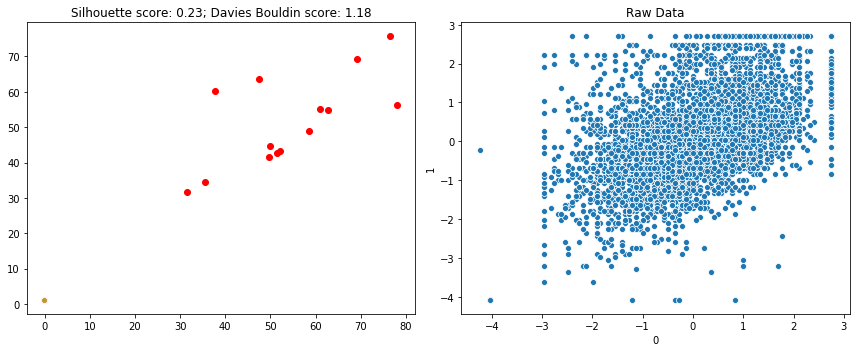


---------------------------------------------

MeanShift Clustering with bandwidth of 15.000.
Red markers are the cluster centers.


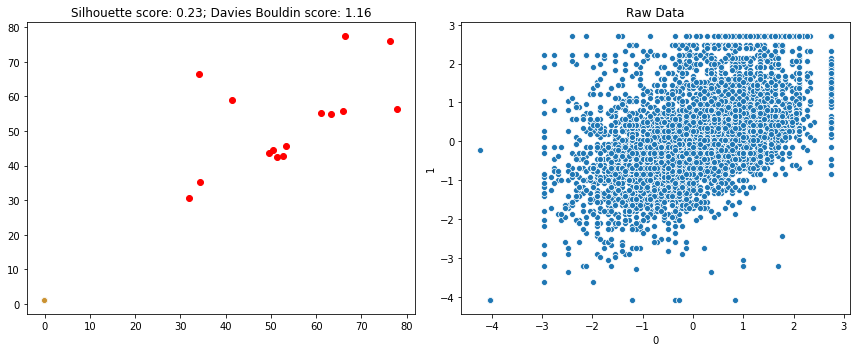


---------------------------------------------

MeanShift Clustering with bandwidth of 16.000.
Red markers are the cluster centers.


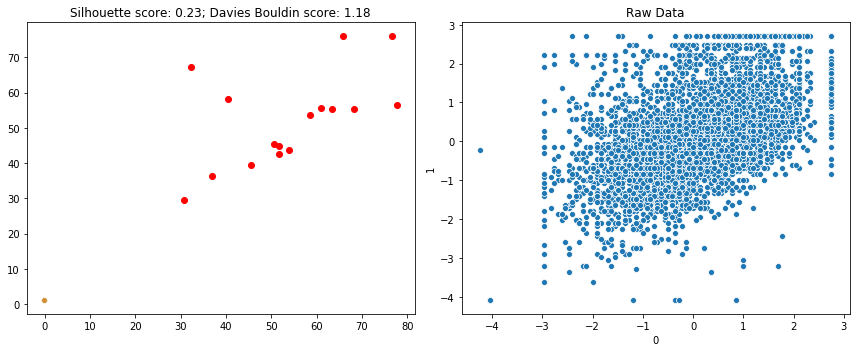


---------------------------------------------

MeanShift Clustering with bandwidth of 17.000.
Red markers are the cluster centers.


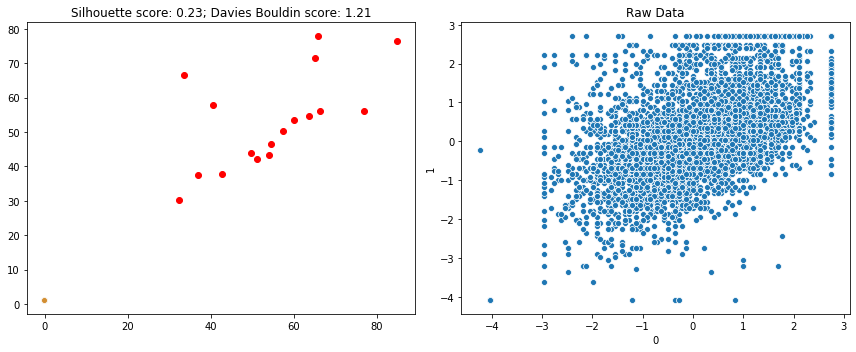


---------------------------------------------

MeanShift Clustering with bandwidth of 18.000.
Red markers are the cluster centers.


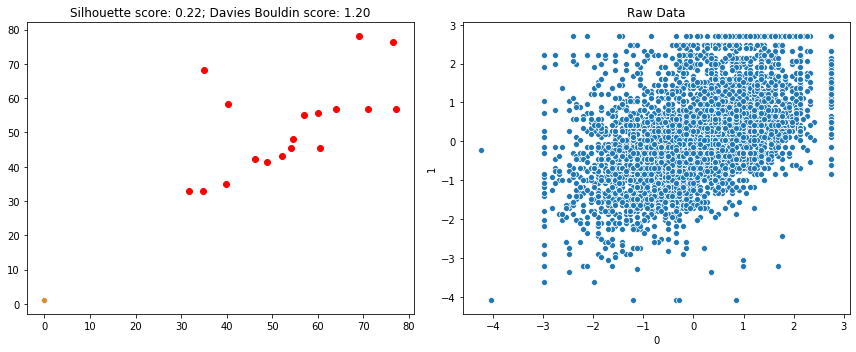


---------------------------------------------

MeanShift Clustering with bandwidth of 19.000.
Red markers are the cluster centers.


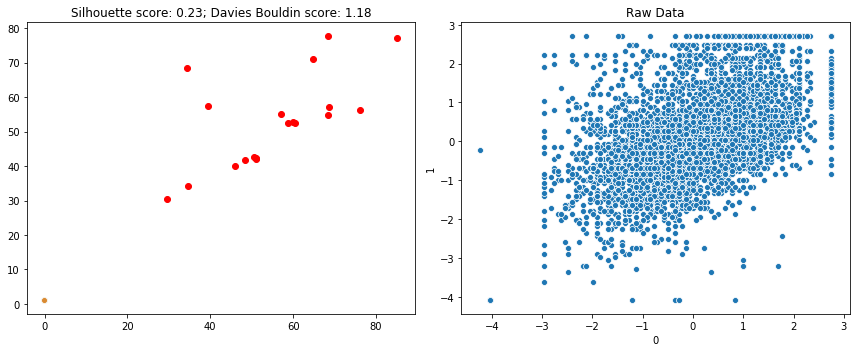


---------------------------------------------

MeanShift Clustering with bandwidth of 20.000.
Red markers are the cluster centers.


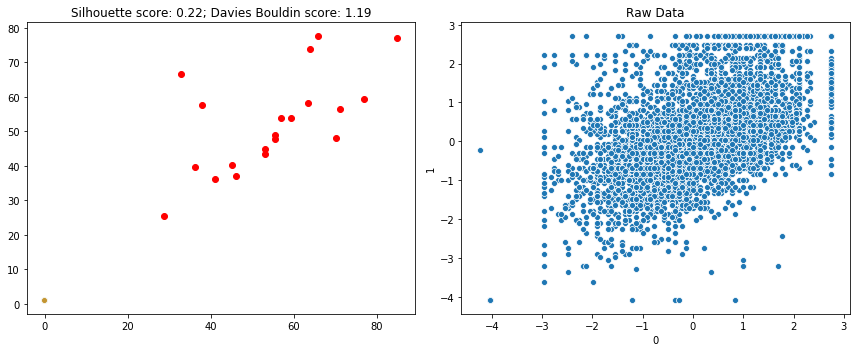


---------------------------------------------

MeanShift Clustering with bandwidth of 21.000.
Red markers are the cluster centers.


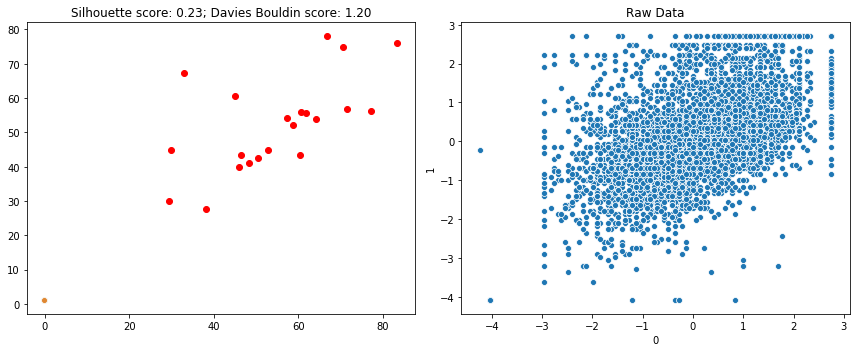


---------------------------------------------

MeanShift Clustering with bandwidth of 22.000.
Red markers are the cluster centers.


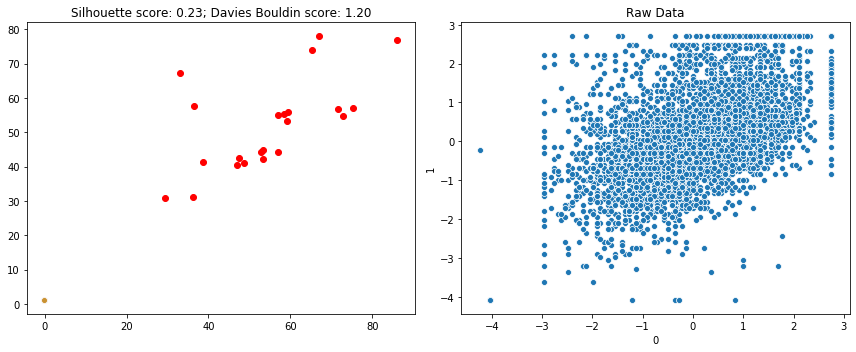


---------------------------------------------

MeanShift Clustering with bandwidth of 23.000.
Red markers are the cluster centers.


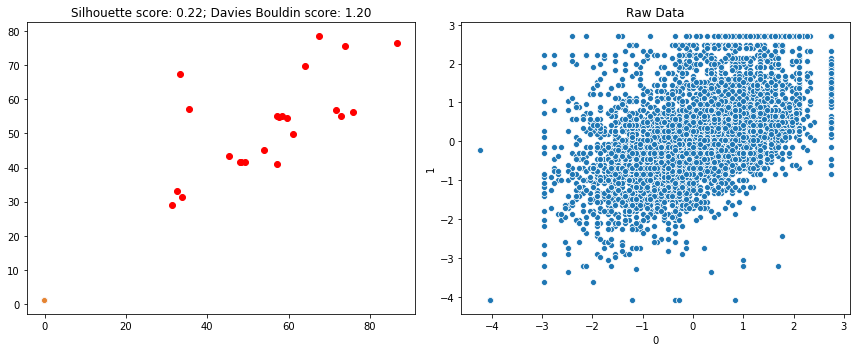


---------------------------------------------

MeanShift Clustering with bandwidth of 24.000.
Red markers are the cluster centers.


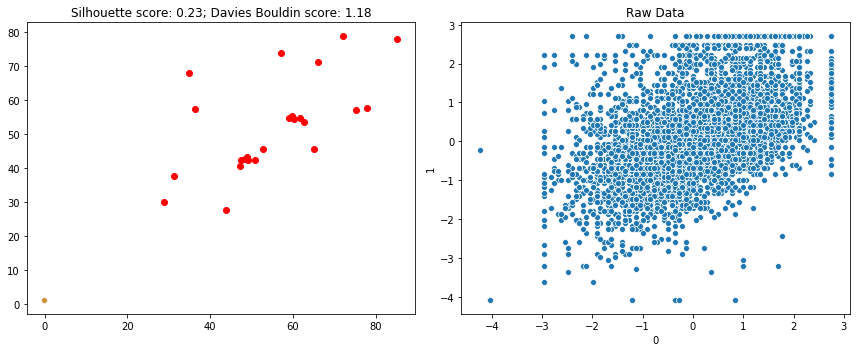


---------------------------------------------

MeanShift Clustering with bandwidth of 25.000.
Red markers are the cluster centers.


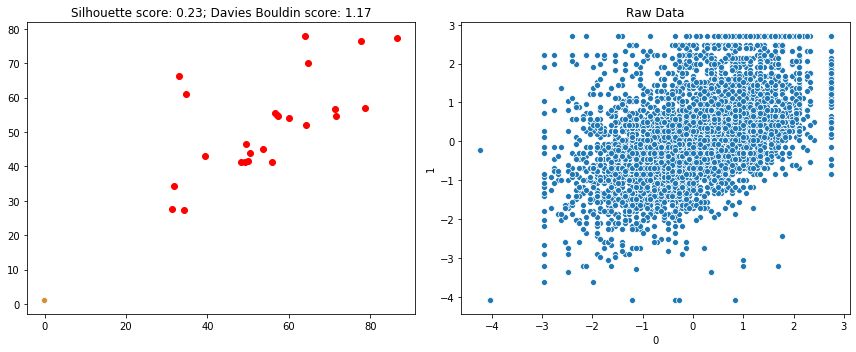


---------------------------------------------

MeanShift Clustering with bandwidth of 26.000.
Red markers are the cluster centers.


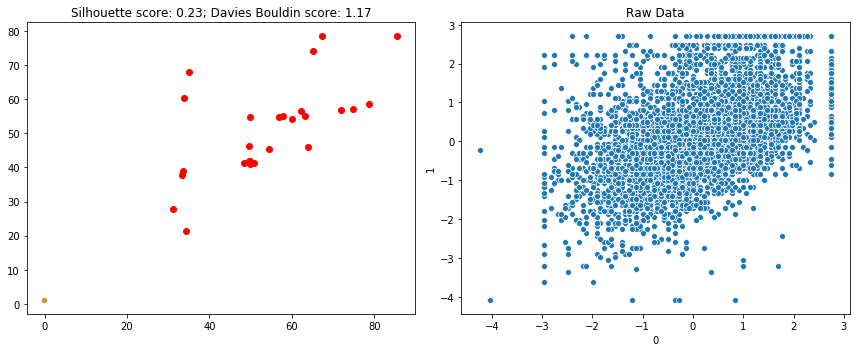


---------------------------------------------

MeanShift Clustering with bandwidth of 27.000.
Red markers are the cluster centers.


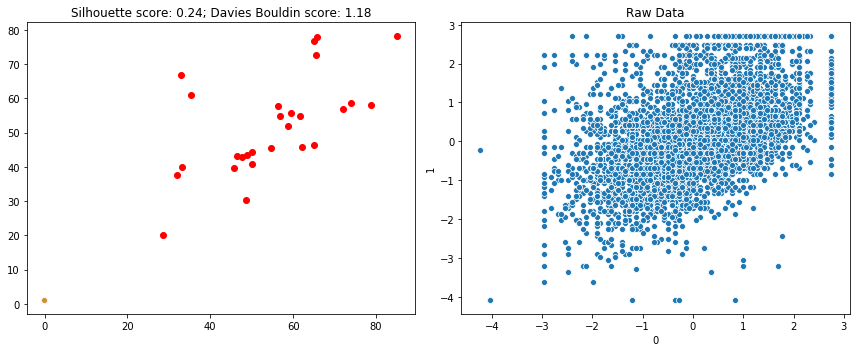


---------------------------------------------

MeanShift Clustering with bandwidth of 28.000.
Red markers are the cluster centers.


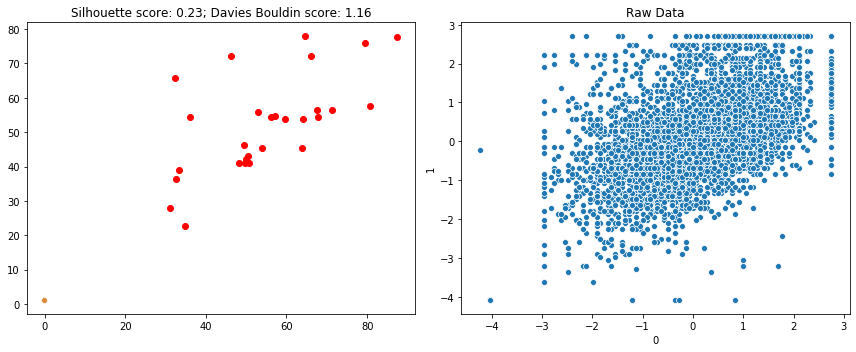


---------------------------------------------

MeanShift Clustering with bandwidth of 29.000.
Red markers are the cluster centers.


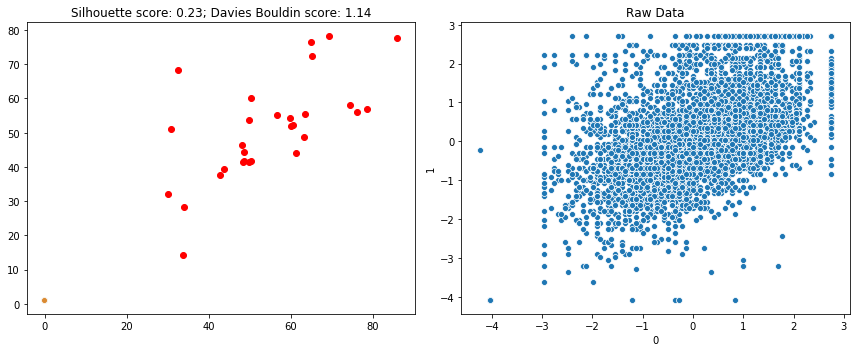


---------------------------------------------

MeanShift Clustering with bandwidth of 30.000.
Red markers are the cluster centers.


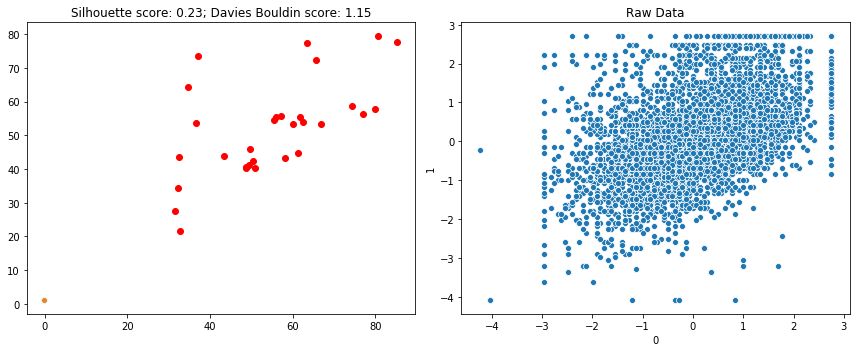


---------------------------------------------




In [13]:
# answer goes here
sscores = []
dscores = []
bws = range(2,31)
for bw in tqdm(bws):
    clst = KMeans(bw)
    clst.fit(scld)

    sscore = silhouette_score(scld, clst.labels_)
    dscore = davies_bouldin_score(scld, clst.labels_)

    sscores.append(sscore)
    dscores.append(dscore)

    df["label"] = clst.labels_
    df["label"] = df["label"].astype(str) + "_"

    unscaled = scaler.inverse_transform(clst.cluster_centers_)
    centroids = pd.DataFrame(unscaled)
    centroids["label"] = "Centroid"

    print(f"MeanShift Clustering with bandwidth of {bw:.3f}.")
    print("Red markers are the cluster centers.")

    fig, axes = plt.subplots(1, 2, figsize=(12, 5))
    sns.scatterplot(0, 1, hue="label", data=df, ax=axes[0])
    axes[0].scatter(centroids[0], centroids[1], c="red")
    axes[0].get_legend().remove()
    axes[0].set_title(
        f"Silhouette score: {sscore:.2f}; Davies Bouldin score: {dscore:.2f}"
    )

    sns.scatterplot(0, 1, data=test)
    axes[1].set_title("Raw Data")
    plt.tight_layout()
    plt.show()

    print("\n---------------------------------------------\n")


